In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# data split

t = int(0.7*X.shape[0])

#print(t)
X_train = X[0:t]
X_test = X[t:]
y_train = y[0:t]
y_test = y[t:]
#print(X_train.shape)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
#print(intercept.shape)
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept
k = len(set(y))
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
#print(y_train)
for each_class in range(k):
    cond = y_train==each_class
    #print(cond)
    Y_train_encoded[np.where(cond), each_class] = 1
#print(Y_train_encoded)
#print(m)

In [14]:
class Logistic_Regression:
    
    def __init__(self,X, Y, k, n, max_iter=1000):
        self.X = X
        self.Y = Y
        self.k = k
        self.n = n
        self.max_iter = max_iter
        
    def fit(self,method):
        self.W = np.random.rand(n, k)
        #print(self.W.shape)
        l_rate = 0.01
        start = time.time()
        self.losses_curve = []
        if method == 'batch':
            for i in range(self.max_iter):
                X = self.X
                Y = self.Y
                cost, grad =  self.gradient(X,Y)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                    self.losses_curve.append(cost)
                self.W = self.W - l_rate * grad
            finish = time.time()-start
            print("The time taken to finish is: ",finish)
        elif method == 'minibatch':
            size = int(0.1*m)
            #print(type(size))
            for i in range(self.max_iter):
                a = np.random.randint(m)
                X = self.X[a:a+size]
                Y = self.Y[a:a+size]
                cost, grad =  self.gradient(X,Y)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                    self.losses_curve.append(cost)
                self.W = self.W - l_rate * grad
            finish = time.time()-start
            print("The time taken to finish is: ",finish)
        elif method == 'sto':
            for i in range(self.max_iter):
                a = np.random.randint(m)
                X = self.X[a].reshape(1,-1)
                Y = self.Y[a].reshape(1,-1)
                #print(Y.shape)
                #print(self.X.shape)
                cost, grad =  self.gradient(X,Y)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                    self.losses_curve.append(cost)
                self.W = self.W - l_rate * grad
            finish = time.time()-start
            print("The time taken to finish is: ",finish)
        else :
            raise ValueError("Wrong input")

    def gradient(self,X,Y):
        m = X.shape[0]
        h = self.h_theta(X)
        #print("H.shape is", h.shape)
        #print("Y.shape is", Y.shape)
        cost = - np.sum(Y * np.log(h)) / m
        #print(cost.shape)
        self.error = h - Y
        #print("error is", self.error)
        grad = self.softmax_grad(X)
        return cost, grad

    def softmax(self,theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self,X):
        return  X.T @ self.error
        
    def h_theta(self,X):
        return self.softmax(X @ self.W)
    
    def output(self,X_test):
        return np.argmax(self.softmax(X_test @ self.W),axis = 1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses_curve)) , self.losses_curve, label = "Losses curve")
        plt.title("Losses")
        plt.xlabel("iter")
        plt.ylabel("losses")
        plt.legend()

Cost at iteration 0 1.157393606411613
Cost at iteration 500 0.02941873066582177
Cost at iteration 1000 0.020429804753790394
Cost at iteration 1500 0.016552375603134786
Cost at iteration 2000 0.014247316979977654
Cost at iteration 2500 0.01266809225216442
Cost at iteration 3000 0.011495003465246375
Cost at iteration 3500 0.010576777272403722
Cost at iteration 4000 0.009831226542428247
Cost at iteration 4500 0.009209283940591059
The time taken to finish is:  0.32359910011291504
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.80      0.89        45

    accuracy                           0.80        45
   macro avg       0.50      0.40      0.44        45
weighted avg       1.00      0.80      0.89        45



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


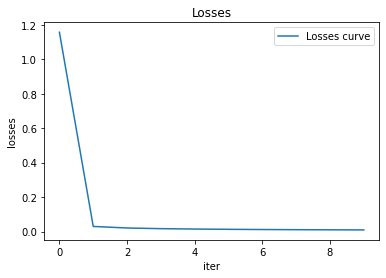

In [16]:
c = Logistic_Regression(X_train, Y_train_encoded, k, X_train.shape[1], max_iter=5000)
method = "batch"
c.fit(method)
yhat = c.output(X_test)
c.plot()
#print(yhat)
print(classification_report(y_test,yhat))

Cost at iteration 0 1.3140592163033495
Cost at iteration 500 0.037820139546769896
Cost at iteration 1000 0.4125126014726726
Cost at iteration 1500 0.10319963796824354
Cost at iteration 2000 0.008007127259770751
Cost at iteration 2500 0.006660986964693742
Cost at iteration 3000 0.02653197279259072
Cost at iteration 3500 0.008910876160991312
Cost at iteration 4000 0.003935124863034259
Cost at iteration 4500 0.0044831973229276295
The time taken to finish is:  0.30103588104248047
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.76      0.86        45

    accuracy                           0.76        45
   macro avg       0.50      0.38      0.43        45
weighted avg       1.00      0.76      0.86        45



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


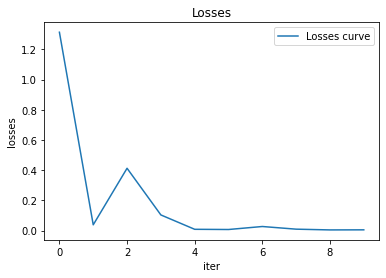

In [19]:
c = Logistic_Regression(X_train, Y_train_encoded, k, X_train.shape[1], max_iter=5000)
method = "minibatch"
c.fit(method)
yhat = c.output(X_test)
c.plot()
#print(yhat)
print(classification_report(y_test,yhat))

Cost at iteration 0 1.190496755734792
Cost at iteration 500 0.06462776403954204
Cost at iteration 1000 0.05282378902528192
Cost at iteration 1500 0.18100870693897372
Cost at iteration 2000 0.03793533997361757
Cost at iteration 2500 0.1455811015217323
Cost at iteration 3000 1.5678236506133554
Cost at iteration 3500 0.02104196059808918
Cost at iteration 4000 0.045441587281600124
Cost at iteration 4500 0.08667315248077766
The time taken to finish is:  0.2843003273010254
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.22      0.36        45

    accuracy                           0.22        45
   macro avg       0.50      0.11      0.18        45
weighted avg       1.00      0.22      0.36        45



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


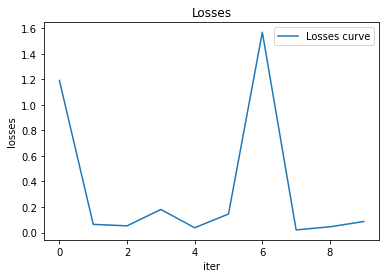

In [18]:
c = Logistic_Regression(X_train, Y_train_encoded, k, X_train.shape[1], max_iter=5000)
method = "sto"
c.fit(method)
yhat = c.output(X_test)
c.plot()
#print(yhat)
print(classification_report(y_test,yhat))

Conclusion

From the three results above, we can see that in terms of time taken to finish the analysis, The method "batch" took the most time followed by "minibatch" and then "sto", which should be natural because "batch" analysed all the sample while "minibatch" only pick some number of sample to analysed and "sto" only pick one sample to analysed per iterations. As for the losses curve, because the "batch" method used all sample for analysis, It has the most stable curve while the "minibatch" has some unstable region but for the "sto" we can clearly see that the curve is very unstable because it used one sample for analysis in each iterations.